In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_excel(r"customer_churn_large_dataset.xlsx")

Data Insight

In [3]:
df.shape

(100000, 9)

In [4]:
df.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object

In [5]:
#check null values
df.isna().any().sum()

0

Data Visualization/ check outliers

<AxesSubplot: ylabel='Gender'>

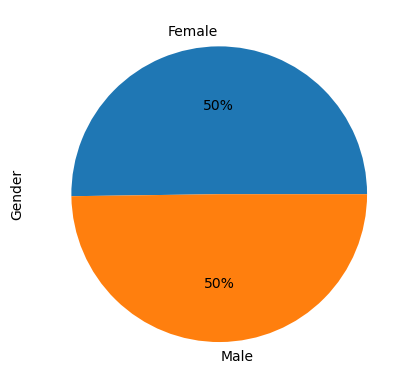

In [6]:
df.Gender.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot: ylabel='Location'>

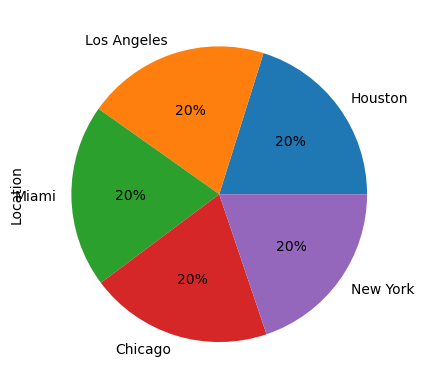

In [7]:
df.Location.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [8]:
df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [9]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


<AxesSubplot: >

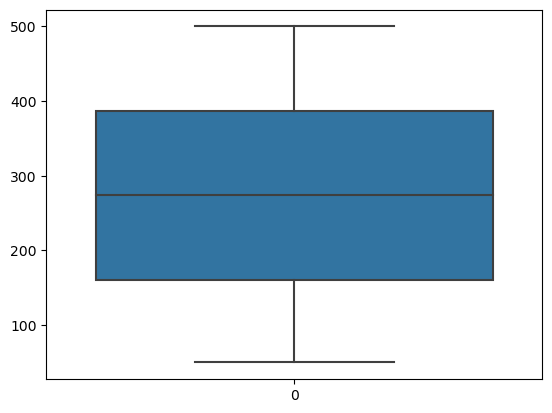

In [10]:
#check outliers for for Total_Usage_GB
sns.boxplot(df['Total_Usage_GB'])

<AxesSubplot: >

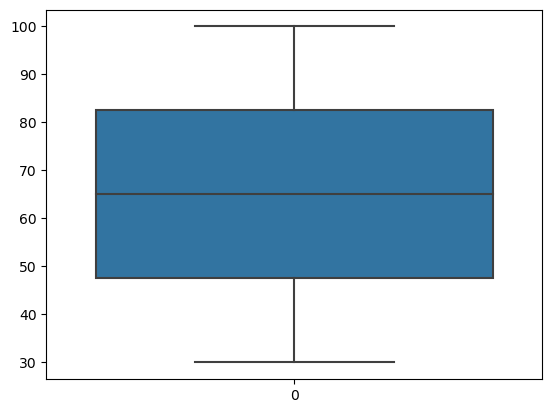

In [11]:
#check outliers for for Monthly_Bill
sns.boxplot(df['Monthly_Bill'])

<AxesSubplot: >

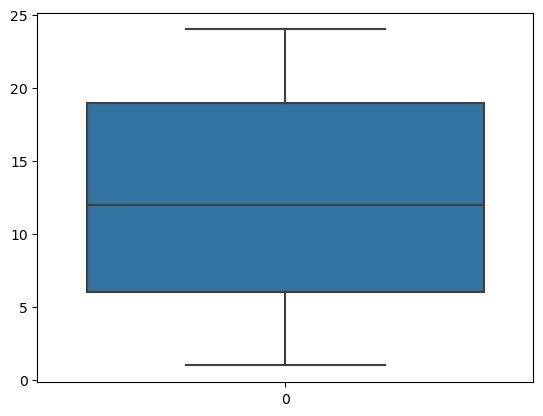

In [12]:
#check outliers for Subscription_Length_Months
sns.boxplot(df['Subscription_Length_Months'])

<AxesSubplot: >

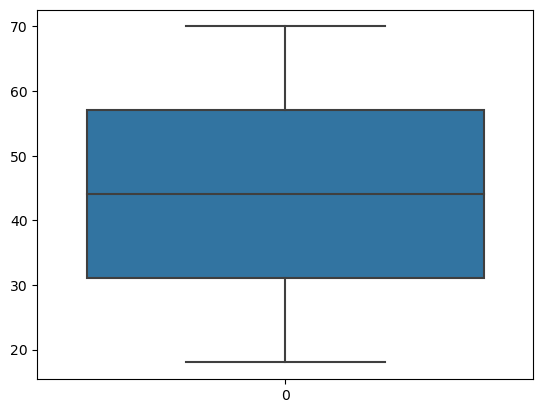

In [13]:
#check outliers for Age
sns.boxplot(df['Age'])

0.0    50221
1.0    49779
Name: Churn, dtype: int64


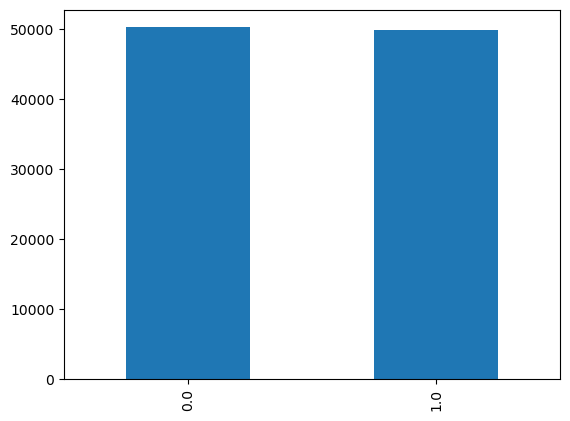

In [14]:
#Counting 1 and 0 Value in Churn column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Churn"].map(lambda x: color_wheel.get(x + 1))
print(df.Churn.value_counts())
p=df.Churn.value_counts().plot(kind="bar")

Data preprocessing

In [15]:
#One-hot Encoding
df = pd.get_dummies(df, columns = ['Location'])

In [16]:
#label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,CustomerID,Name,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1.0,Customer_1,63.0,1,17.0,73.36,236.0,0.0,0,0,1,0,0
1,2.0,Customer_2,62.0,0,1.0,48.76,172.0,0.0,0,0,0,0,1
2,3.0,Customer_3,24.0,0,5.0,85.47,460.0,0.0,0,0,1,0,0
3,4.0,Customer_4,36.0,0,3.0,97.94,297.0,1.0,0,0,0,1,0
4,5.0,Customer_5,46.0,0,19.0,58.14,266.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996.0,Customer_99996,33.0,1,23.0,55.13,226.0,1.0,0,1,0,0,0
99996,99997.0,Customer_99997,62.0,0,19.0,61.65,351.0,0.0,0,0,0,0,1
99997,99998.0,Customer_99998,64.0,1,17.0,96.11,251.0,1.0,1,0,0,0,0
99998,99999.0,Customer_99999,51.0,0,20.0,49.25,434.0,1.0,0,0,0,0,1


In [17]:
#Remove customer_id column
df2 = df.drop(['CustomerID','Name'], axis=1)
df2.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63.0,1,17.0,73.36,236.0,0.0,0,0,1,0,0
1,62.0,0,1.0,48.76,172.0,0.0,0,0,0,0,1
2,24.0,0,5.0,85.47,460.0,0.0,0,0,1,0,0
3,36.0,0,3.0,97.94,297.0,1.0,0,0,0,1,0
4,46.0,0,19.0,58.14,266.0,0.0,0,0,0,1,0


Build Machine Learning Model

In [18]:
#split dataset into test and train
X = df2.drop('Churn', axis=1)
y = df2['Churn']

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=1)

In [19]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

Random Forest and use cross-validation

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# Cross-validation with 5 folds
rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", rfc_scores)
print("Mean Cross-Validation Score:", rfc_scores.mean())

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Random Forest Cross-Validation Scores: [0.5022     0.50193333 0.49566667 0.5022     0.49753333]
Mean Cross-Validation Score: 0.4999066666666666


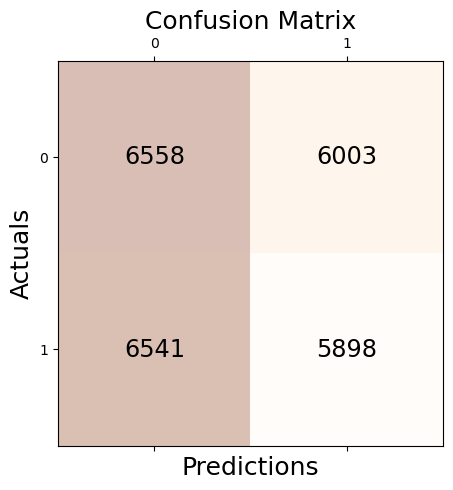

In [21]:
y_pred = rfc.predict(X_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score	

print('Precision: %.3f' % precision_score(y_test, y_pred))
	
print('Recall: %.3f' % recall_score(y_test, y_pred))
	
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

print('F1 Score: %.3f' % f1_score(y_test, y_pred))


Precision: 0.496
Recall: 0.474
Accuracy: 0.498
F1 Score: 0.485


Logistic Regression and use cross-validation

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1)

# Cross-validation with 5 folds
clf_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", clf_scores)
print("Mean Cross-Validation Score:", clf_scores.mean())


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Logistic Regression Cross-Validation Scores: [0.5046     0.5016     0.50193333 0.49926667 0.503     ]
Mean Cross-Validation Score: 0.5020800000000001


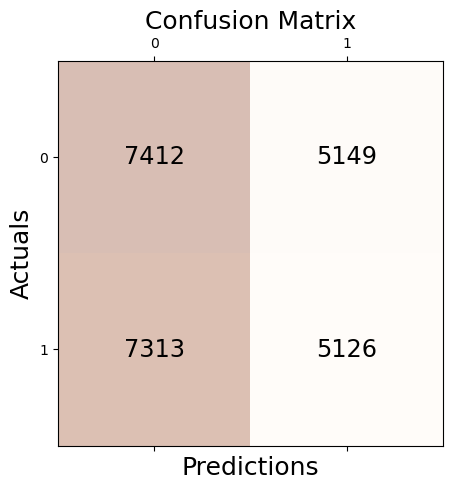

In [24]:
y_pred = clf.predict(X_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score	

print('Precision: %.3f' % precision_score(y_test, y_pred))
	
print('Recall: %.3f' % recall_score(y_test, y_pred))
	
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.499
Recall: 0.412
Accuracy: 0.502
F1 Score: 0.451
